In [38]:
!pip install seaborn

In [39]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Lets load the Diabetes dataset

In [40]:
diabetes = datasets.load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [41]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [42]:
X = diabetes.data
y = diabetes.target
feature_names = diabetes.feature_names

## Preparing The Dataset

In [43]:
df = pd.DataFrame(X, columns=feature_names)
df['Progression'] = y

In [44]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [45]:
df = df.drop(["sex","Progression"], axis=1)
df.head()

,age,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   bmi     442 non-null    float64
 2   bp      442 non-null    float64
 3   s1      442 non-null    float64
 4   s2      442 non-null    float64
 5   s3      442 non-null    float64
 6   s4      442 non-null    float64
 7   s5      442 non-null    float64
 8   s6      442 non-null    float64
dtypes: float64(9)
memory usage: 31.2 KB


In [47]:
## Check the missing Values
df.isnull().sum()

,0
age,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


## Train Test Split


In [11]:
df

,age,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...
437,0.041708,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [12]:
X=df#.drop(["Progression"], axis=1)

In [13]:
print(X.shape)
print(y.shape)

(442, 9)
(442,)


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [15]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [16]:
X_train=scaler.fit_transform(X_train)

In [17]:
X_test=scaler.transform(X_test)

## Model Training

In [18]:
from sklearn.linear_model import LinearRegression

regression=LinearRegression()

In [19]:
regression.fit(X_train,y_train)

LinearRegression()

In [20]:
## print the coefficients and the intercept
print(regression.coef_)

[ -0.03997084  28.50394622  16.44279367 -39.33388097  22.59977214
   6.51661189   8.78840068  32.34601591   1.65526226]


In [21]:
print(regression.intercept_)

153.90291262135923


In [22]:
### Prediction With Test Data
pred = regression.predict(X_test)

In [23]:
pred

array([128.88291705, 169.87116483, 146.41140389, 265.04460155,
       133.32878864,  85.76423904, 275.80279552, 195.89111369,
        98.78539647, 127.22843343,  89.21461575, 149.9493281 ,
        51.65744334, 212.76148452, 111.4757912 , 145.09628294,
       228.50040249, 256.77146791, 208.90273165, 227.37622794,
       198.19442248,  77.97936796,  64.15408685, 198.63364552,
       152.53960654, 169.96658264, 202.08972327, 184.25684154,
        43.90349495, 121.41700071, 168.05765059,  81.17618661,
       145.35087799, 189.13027508, 159.52522011, 211.98721695,
       133.95529468, 128.94868077, 151.60931582,  51.31758324,
        62.46877544, 120.8831842 , 171.52977749, 152.86680155,
       156.14259816,  58.56487499,  67.43556863, 104.33799373,
        43.89771046, 157.87554484, 149.67664084,  57.79306816,
       114.14744598,  99.24205682, 182.49393022, 153.55933403,
        85.01426542, 221.27412376, 113.60265259,  70.4696218 ,
       175.88846879, 195.85458798, 160.26918315, 118.84

## Assumptions

In [24]:
## plot a scatter plot for the prediction
#plt.scatter(y_test, reg_pred)

In [25]:
## Residuals
residuals = y_test-pred

In [26]:
residuals

array([  90.11708295,  -99.87116483,   55.58859611,  -35.04460155,
        -22.32878864,   -1.76423904,  -33.80279552,   76.10888631,
         -4.78539647,  -31.22843343,    4.78538425,  102.0506719 ,
         47.34255666,   84.23851548,   23.5242088 ,  -78.09628294,
         66.49959751,    7.22853209,  -38.90273165,   47.62377206,
        111.80557752,  -13.97936796,   63.84591315,   33.36635448,
        -23.53960654,  -51.96658264,   60.91027673, -107.25684154,
          4.09650505,  -14.41700071,  -28.05765059,   31.82381339,
        -55.35087799,  -25.13027508,   20.47477989,   21.01278305,
        -91.95529468,  -44.94868077,   20.39068418,   11.68241676,
        -14.46877544,  -12.8831842 ,  -15.52977749,   15.13319845,
        -66.14259816,   -6.56487499,  132.56443137,  -17.33799373,
         46.10228954,  100.12445516,  -13.67664084,  100.20693184,
        -45.14744598,  -27.24205682,  -11.49393022,  -58.55933403,
        -13.01426542,  -70.27412376,   54.39734741,  -10.46962

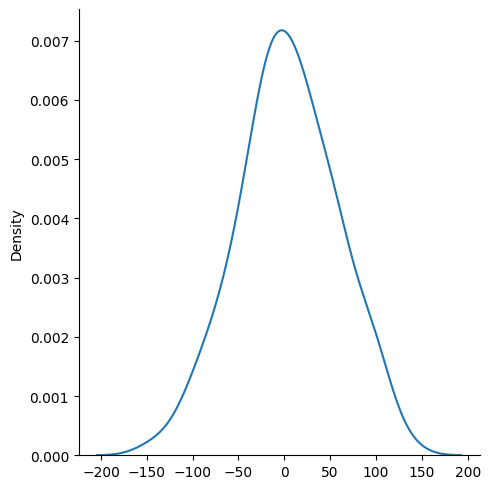

In [27]:
## Plot this residuals

sns.displot(residuals, kind="kde")

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, pred))
print(mean_squared_error(y_test, pred))
print(np.sqrt(mean_squared_error(y_test, pred)))

42.85111146393169
2870.7675447531806
53.57954408870218


## R square and adjusted R square


Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares


In [29]:
from sklearn.metrics import r2_score
score=r2_score(y_test, pred)
print(score)

0.4682097295337849


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [30]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.42929824632894

## New Data Prediction

In [31]:
#new = diabetes.data[0].reshape(1, -1)

In [32]:
#new

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613]])

In [34]:
#new_scaled = scaler.transform(new)

In [ ]:
#pred_new = regression.predict(new_scaled)

In [ ]:
#pred_new[0]

## Pickling The Model file For Deployment

In [35]:
import pickle

In [36]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [37]:

pickle.dump(scaler,open('scaling.pkl','wb'))

In [ ]:
var = {
    "CRIM": 0.00632,
    "ZN": 18,
    "INDUS": 2.31,
    "CHAS": 0,
    "NOX": 0.538,
    "RM": 6.575,
    "AGE": 65.2,
    "DIS": 4.09,
    "RAD": 1,
    "TAX": 296,
    "PTRATIO": 15.3,
    "B": 396.9,
    "LSTAT": 4.98
}

In [ ]:
import json
import pandas as pd